In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/content/Austin 2023-09-21 to 2023-09-26.csv")

In [3]:
features = ['tempmax', 'tempmin', 'humidity', 'dew']
target = 'precip'
data = data.dropna(subset=features + [target])

In [4]:
X = data[features]
y = data[target]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [6]:
y_pred = model.predict(X_test)

Mean Squared Error: 0.03620845854980239
Root Mean Squared Error: 0.19028520318144126
R-squared: 0.0


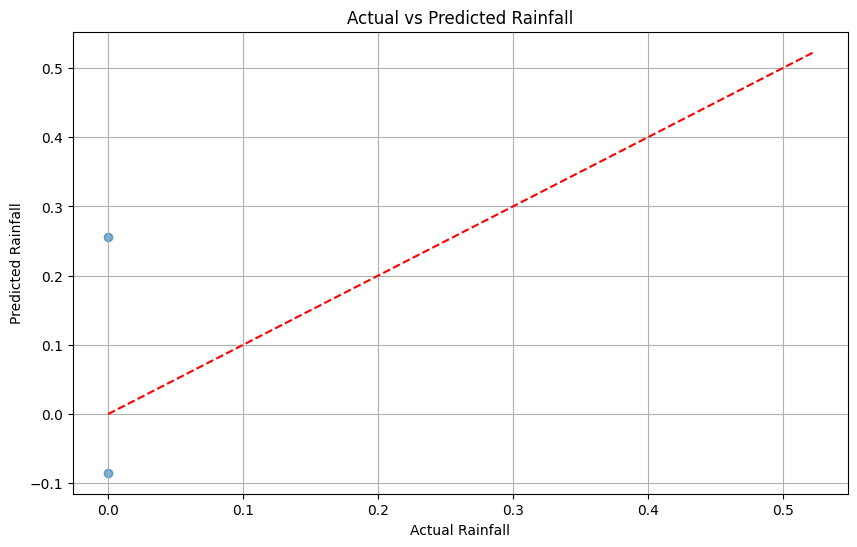

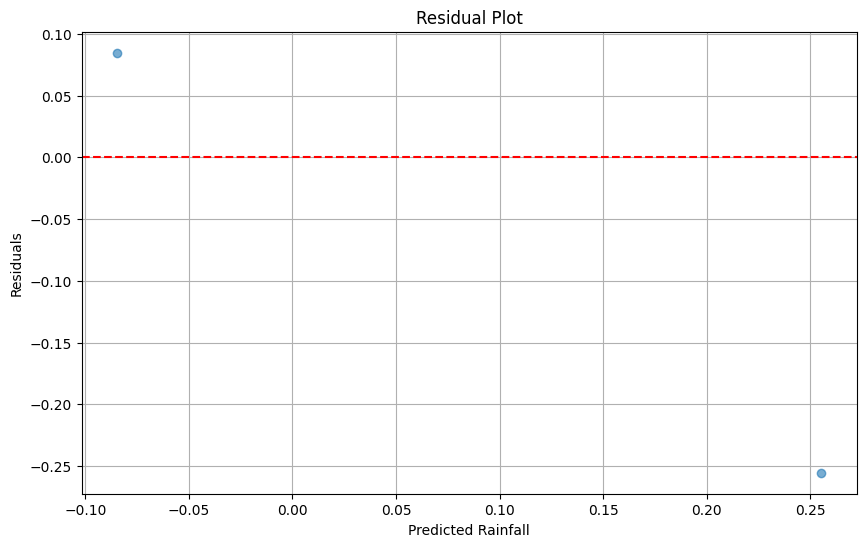

In [7]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted Rainfall')
plt.xlabel('Actual Rainfall')
plt.ylabel('Predicted Rainfall')
plt.grid()
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Rainfall')
plt.ylabel('Residuals')
plt.grid()
plt.show()